In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Datasets


In [2]:
all_df= pd.read_csv('synthetic_fraud_data.csv')

In [3]:
all_df.shape

(7483766, 24)

In [4]:
# df= all_df.sample(frac=0.1, random_state=42)
df= all_df.sample(frac=0.6)
df.shape

(4490260, 24)

#### Feature Engineering

In [5]:
df.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'merchant_category', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'card_present', 'device',
       'channel', 'device_fingerprint', 'ip_address', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'velocity_last_hour', 'is_fraud'],
      dtype='object')

In [6]:
df.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
439302,TX_5e2d9052,CUST_40461,376051937284064,2024-10-01 19:24:13.705749+00:00,Grocery,online,Walmart Grocery,539.64,AUD,Australia,...,Safari,web,4ffe72d61ca839b5dcb602148d9cfcfd,155.234.226.165,0,False,19,False,"{'num_transactions': 1099, 'total_amount': 328...",False
3488811,TX_72434e94,CUST_36936,4695025404536434,2024-10-14 11:53:58.511598+00:00,Gas,major,Exxon,172.44,CAD,Canada,...,iOS App,mobile,b492d4ae44c3d1bea4c796d1c0c60e62,74.208.165.111,0,False,11,False,"{'num_transactions': 265, 'total_amount': 5560...",False
5217984,TX_8df3b357,CUST_11344,377055034743699,2024-10-21 15:29:32.637886+00:00,Healthcare,pharmacy,CVS Pharmacy,209269.25,NGN,Nigeria,...,Android App,mobile,680a10b46444b34d55412c92fe35e032,105.110.39.77,1,False,15,False,"{'num_transactions': 151, 'total_amount': 5096...",True
1546452,TX_d59e0570,CUST_64924,6123560972765426,2024-10-06 10:51:56.926993+00:00,Gas,major,BP,586.35,AUD,Australia,...,Chrome,web,e407183f77725054f1c4df5547efad06,115.149.59.10,0,False,10,True,"{'num_transactions': 1153, 'total_amount': 205...",False
3769923,TX_8b53d568,CUST_32023,4458921086364409,2024-10-15 15:26:07.835922+00:00,Retail,physical,Target,15360.11,RUB,Russia,...,Chrome,web,ea542727ad13855f5a9348e66637af47,96.234.107.165,0,False,15,False,"{'num_transactions': 657, 'total_amount': 2738...",False


#### features and label

In [7]:
df.merchant_type.value_counts()

merchant_type
online       840329
physical     561378
medical      281957
pharmacy     280912
local        280354
major        280161
supplies     280092
fast_food    187605
events       187460
casual       187354
gaming       187339
streaming    186995
premium      186881
hotels       140706
booking      140386
transport    140237
airlines     140114
Name: count, dtype: int64

col_to_drop= ['transaction_id', 'customer_id', 'card_number', 'timestamp', 'ip_address', 'velocity_last_hour']
one_enc= ['merchant_category', 'card_type', 'device', 'channel']
ord_enc= ['city_size']
freq_enc=  ['merchant_type', 'merchant', 'device_fingerprint', 'currency', 'country','city']
label_enc= ['card_present', 'high_risk_merchant', 'weekend_transaction']

num_cols= ['dis_from_home', 'transacton_hr', 'amount']

### **We might need to consider column to drop after EDA** 

In [8]:

col_to_drop= ['transaction_id', 'customer_id', 'card_number', 'timestamp', 'ip_address', 'velocity_last_hour','device_fingerprint' ]
one_enc= ['merchant_category', 'card_type', 'device', 'channel']
ord_enc= ['city_size']
freq_enc=  ['merchant_type', 'merchant',  'currency', 'country','city']
label_enc= ['card_present', 'high_risk_merchant', 'weekend_transaction']

num_cols= ['distance_from_home', 'transaction_hour', 'amount']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler

In [10]:
df.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'merchant_category', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'card_present', 'device',
       'channel', 'device_fingerprint', 'ip_address', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'velocity_last_hour', 'is_fraud'],
      dtype='object')

#### feature and label

### Splitting Data

In [11]:
df.drop(col_to_drop, axis=1, inplace=True)

X= df.drop('is_fraud', axis=1)
y= df.is_fraud

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

In [13]:
X_train[:2]

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
6681808,Entertainment,streaming,HBO Max,15330.67,RUB,Russia,Unknown City,medium,Premium Debit,False,Firefox,web,0,True,16,True
6935643,Travel,transport,Hertz,109355.10,NGN,Nigeria,Unknown City,medium,Premium Debit,False,Android App,mobile,1,True,17,False


#### frequency encoding

In [14]:
# frequency encoding
all_freq_map= {}
for col in freq_enc:
    freq_map= X_train[col].value_counts().to_dict()
    all_freq_map[col]= freq_map     # save to all_freq_map  and dump later 
    X_train[col]= X_train[col].map(freq_map)
    
    # replace Nan with minimum value (for unseen data)    
    X_test[col]= X_test[col].map(freq_map).fillna(min(freq_map.values()))
    
# remaining encoding

#### feature encoding

In [15]:
ct= ColumnTransformer(transformers=[
    ('one-hot', OneHotEncoder(), one_enc),
    ('ordinal', OrdinalEncoder(categories= [['medium', 'large']]), ord_enc),
    # ('bin-value', LabelEncoder(), label_enc)
    
], remainder='passthrough')

le= LabelEncoder()
sc= StandardScaler()

# encode features
X_train_enc= ct.fit_transform(X_train)
X_test_enc= ct.transform(X_test)

# encode label 
y_train_enc= le.fit_transform(y_train)
y_test_enc= le.transform(y_test)

# standardarize 
X_train_enc= sc.fit_transform(X_train_enc)  # only numeric and frequency encoded columns only 
X_test_enc= sc.transform(X_test_enc)

X_train_enc= ct.fit_transform(X_train[:1000])
X_test_enc= ct.fit_transform(X_test[:1000])

X_train_enc= sc.fit_transform(X_train_enc)
X_test_enc= sc.transform(X_test_enc)


y_train_enc= le.fit_transform(y_train[:1000])
y_test_enc= le.transform(y_test[:1000])mm

In [16]:
X_train_enc

array([[-0.37725515,  2.64543823, -0.37807798, ...,  1.73178212,
         0.58739031,  1.69702146],
       [-0.37725515, -0.3780092 , -0.37807798, ...,  1.73178212,
         0.74039072, -0.58926774],
       [ 2.6507259 , -0.3780092 , -0.37807798, ..., -0.57743985,
         1.04639156,  1.69702146],
       ...,
       [-0.37725515, -0.3780092 ,  2.644957  , ..., -0.57743985,
         1.04639156, -0.58926774],
       [-0.37725515, -0.3780092 , -0.37807798, ..., -0.57743985,
        -1.0956143 ,  1.69702146],
       [-0.37725515, -0.3780092 , -0.37807798, ..., -0.57743985,
        -1.86061639, -0.58926774]], shape=(3592208, 37))

#### get feature names

In [17]:
# Get feature names after transformation
feature_names = (ct.named_transformers_['one-hot'].get_feature_names_out(one_enc).tolist() + 
                ['city_size'] + 
                [col for col in X.columns if col not in one_enc + ord_enc])

X_train_enc= pd.DataFrame(data=X_train_enc, columns=feature_names)
X_test_enc= pd.DataFrame(data=X_test_enc, columns=feature_names)

In [18]:
X_test_enc[:2]

,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,card_type_Basic Credit,card_type_Basic Debit,...,merchant,amount,currency,country,city,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
0,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,2.644876,-0.378199,-0.37802,-0.482885,-0.510650,...,-0.610061,-0.269069,1.782307,-0.912807,0.267312,-0.308215,-0.689410,-0.577440,-0.636613,-0.589268
1,-0.377255,2.645438,-0.378078,-0.377475,-0.378589,-0.378090,-0.378199,-0.37802,-0.482885,1.958289,...,-1.107337,-0.248063,0.303398,0.959525,0.267312,-0.308215,1.450515,1.731782,-1.095614,-0.589268


In [19]:
y_train_enc

array([0, 0, 0, ..., 0, 0, 0], shape=(3592208,))

In [20]:
ct.transform(X_train[:1])

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        149256, 21167, 15330.67, 380834, 380834, 3352643, False, 0, True,
        16, True]], dtype=object)

#### Build a model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model= LogisticRegression()
model.fit(X_train_enc, y_train_enc)


LogisticRegression()

In [23]:
model.score(X_train_enc, y_train_enc), model.score(X_test_enc, y_test_enc)

(0.9239506732349574, 0.9236347115757216)

In [24]:
df.is_fraud.value_counts()/ len(df)

is_fraud
False    0.800209
True     0.199791
Name: count, dtype: float64

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

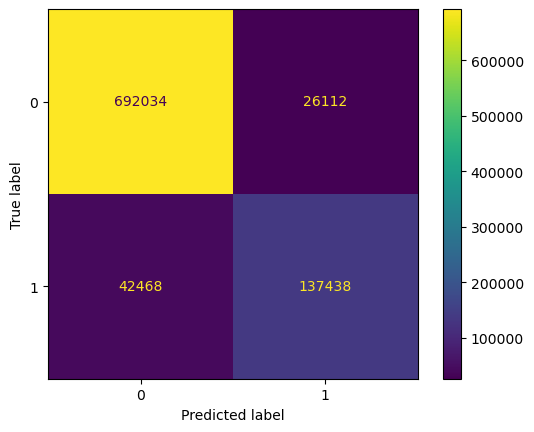

In [26]:
y_pred= model.predict(X_test_enc)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_enc, y_pred)).plot()

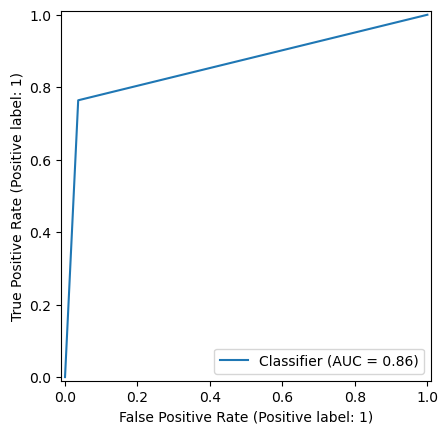

In [27]:
RocCurveDisplay.from_predictions(y_test_enc, y_pred)

In [28]:
df.is_fraud.value_counts()/len(df)

is_fraud
False    0.800209
True     0.199791
Name: count, dtype: float64

In [29]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    718146
           1       0.84      0.76      0.80    179906

    accuracy                           0.92    898052
   macro avg       0.89      0.86      0.88    898052
weighted avg       0.92      0.92      0.92    898052



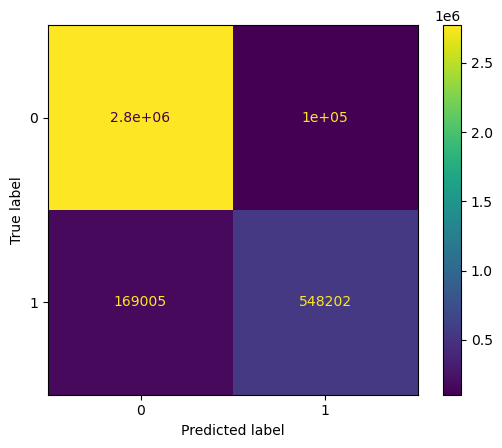

In [30]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_enc, model.predict(X_train_enc))).plot()

#### save the model

as well as encoders

In [31]:
import joblib
import os

# Ensure the directory exists
os.makedirs("./models/encoders", exist_ok=True)
# dump model
joblib.dump(model, './models/model.pkl')

joblib.dump(ct, './models/encoders/col_transformer.pkl')
joblib.dump(sc, './models/encoders/scaler.pkl')

# save freq_map for frequency encoder
joblib.dump(all_freq_map, './models/encoders/all_freq_map.pkl')

# save features names (during training)
joblib.dump(feature_names, './models/feature_names.pkl')

['./models/feature_names.pkl']

In [32]:
print(classification_report(y_train_enc, model.predict(X_train_enc)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95   2875001
           1       0.84      0.76      0.80    717207

    accuracy                           0.92   3592208
   macro avg       0.89      0.86      0.88   3592208
weighted avg       0.92      0.92      0.92   3592208



#### Feature Importance

In [33]:
model.coef_

array([[ 1.19174543e-03,  1.20595381e-02, -8.19630259e-05,
         8.40110445e-03,  8.33033165e-04,  7.03966839e-03,
        -6.40645506e-03, -2.30251286e-02,  1.73919874e-03,
         7.26664446e-03,  7.37483131e-03, -2.18163999e-02,
         5.60874177e-03, -1.45730452e-01,  5.09931268e-01,
        -1.03853106e-01, -1.33339174e-01, -8.72521336e-02,
         5.09173561e-01,  5.07633682e-01, -8.71112649e-02,
        -1.54363419e-01, -2.34156038e-01,  9.08947869e-01,
        -3.03924000e-01, -3.61427192e-03, -8.82858973e-03,
        -6.65990707e-03,  2.28777567e-01, -1.79028453e-02,
         9.60587538e-01, -5.03527741e-02,  9.08947869e-01,
         1.85204379e+00, -8.37558778e-03, -6.81632092e-01,
         4.59242432e-03]])

In [34]:
# Display feature names with their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
print(coef_df)

                            Feature  Coefficient
33               distance_from_home     1.852044
30                          country     0.960588
32                     card_present     0.908948
23                      channel_pos     0.908948
14               device_Chip Reader     0.509931
18           device_Magnetic Stripe     0.509174
19               device_NFC Payment     0.507634
28                           amount     0.228778
1   merchant_category_Entertainment     0.012060
3         merchant_category_Grocery     0.008401
10            card_type_Gold Credit     0.007375
9             card_type_Basic Debit     0.007267
5      merchant_category_Restaurant     0.007040
12          card_type_Premium Debit     0.005609
36              weekend_transaction     0.004592
8            card_type_Basic Credit     0.001739
0       merchant_category_Education     0.001192
4      merchant_category_Healthcare     0.000833
2             merchant_category_Gas    -0.000082
25                  

<Axes: >

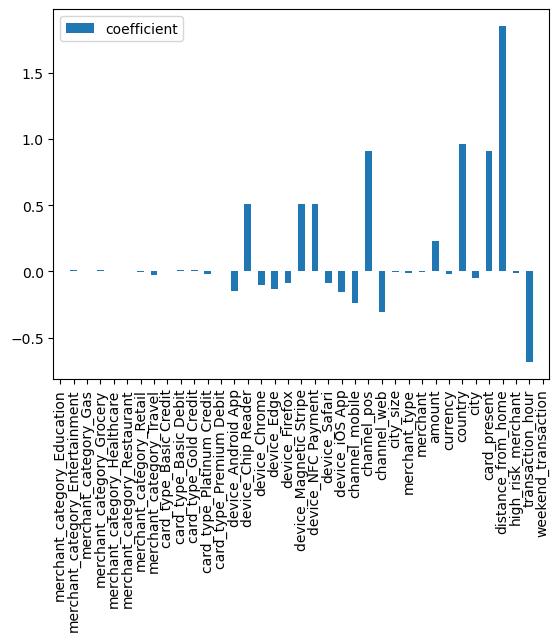

In [35]:
pd.DataFrame({'coefficient': model.coef_[0]}, index=feature_names).plot.bar()

#### make predictions

In [36]:
def make_prediction(pred_set_x):
    pred_set_x= ct.transform(pred_set_x)
    pred_set_x= sc.transform(pred_set_x)
    result= model.predict(pd.DataFrame(pred_set_x, columns=X_train_enc.columns))
    return le.inverse_transform(result)
    # for pred in result:    
    #     if pred:
    #         print("Danger")
    #     else:
    #         print('ok ')

make_prediction(X_test[10:12])

array([False, False])

In [37]:
make_prediction(X_test.sample(15))

array([ True, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False])

pred_df= pd.DataFrame([['Healthcare',	3124,	812,	724949.27,	7143,	7143,	47401,	'medium',	'Basic Debit',	False,	'Chrome',	'web',	1,	1,	False,	0,	False]],
                       columns=X_train.columns)
pred_df

make_prediction(pred_df)

In [38]:
make_prediction(X_test[10:16])

array([False, False, False, False,  True, False])

In [39]:
model.score(X_train_enc, y_train_enc), model.score(X_test_enc, y_test_enc)

(0.9239506732349574, 0.9236347115757216)

In [40]:
y_test_enc, model.predict(X_test_enc)

(array([0, 1, 0, ..., 0, 0, 0], shape=(898052,)),
 array([0, 1, 0, ..., 0, 0, 0], shape=(898052,)))

In [41]:
import numpy as np
print(np.concatenate((y_test_enc.reshape(-1,1), model.predict(X_test_enc).reshape(-1,1)) , axis= 1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Make more predictions

In [42]:
stop here
made intentionally

SyntaxError: invalid syntax (3547097802.py, line 1)

# **EDA**

In [43]:
X_train.head()

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
6681808,Entertainment,149256,21167,15330.67,380834,380834,3352643,medium,Premium Debit,False,Firefox,web,0,True,16,True
6935643,Travel,111993,22401,109355.10,407203,407203,3352643,medium,Premium Debit,False,Android App,mobile,1,True,17,False
4782685,Education,671812,44697,521.40,511806,259822,3352643,medium,Platinum Credit,False,Safari,web,0,False,19,True
2449142,Education,224220,75001,407569.68,407203,407203,3352643,medium,Premium Debit,True,Chip Reader,pos,1,False,4,False
4405470,Education,224220,75001,322.20,511806,259822,3352643,medium,Basic Credit,False,Edge,web,0,False,7,False


In [44]:
X_train_enc.shape

(3592208, 37)

In [45]:
y_train_enc.shape

(3592208,)

In [46]:
df_for_eda = X_train_enc

In [47]:
df_for_eda.head()

,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,card_type_Basic Credit,card_type_Basic Debit,...,merchant,amount,currency,country,city,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
0,-0.377255,2.645438,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,-0.482885,-0.51065,...,-1.115320,-0.183417,0.344873,1.016097,0.267312,-0.308215,-0.689410,1.731782,0.587390,1.697021
1,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,2.645361,-0.482885,-0.51065,...,-1.044452,0.346180,0.634276,1.410845,0.267312,-0.308215,1.450515,1.731782,0.740391,-0.589268
2,2.650726,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,-0.482885,-0.51065,...,0.235981,-0.266830,1.782307,-0.795471,0.267312,-0.308215,-0.689410,-0.577440,1.046392,1.697021
3,2.650726,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,-0.482885,-0.51065,...,1.976303,2.025886,0.634276,1.410845,0.267312,3.244484,1.450515,-0.577440,-1.248615,-0.589268
4,2.650726,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,2.070888,-0.51065,...,1.976303,-0.267952,1.782307,-0.795471,0.267312,-0.308215,-0.689410,-0.577440,-0.789613,-0.589268


In [48]:
df_for_eda['target'] = y_train_enc

In [49]:
df_for_eda.columns

Index(['merchant_category_Education', 'merchant_category_Entertainment',
       'merchant_category_Gas', 'merchant_category_Grocery',
       'merchant_category_Healthcare', 'merchant_category_Restaurant',
       'merchant_category_Retail', 'merchant_category_Travel',
       'card_type_Basic Credit', 'card_type_Basic Debit',
       'card_type_Gold Credit', 'card_type_Platinum Credit',
       'card_type_Premium Debit', 'device_Android App', 'device_Chip Reader',
       'device_Chrome', 'device_Edge', 'device_Firefox',
       'device_Magnetic Stripe', 'device_NFC Payment', 'device_Safari',
       'device_iOS App', 'channel_mobile', 'channel_pos', 'channel_web',
       'city_size', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'card_present', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'target'],
      dtype='object')

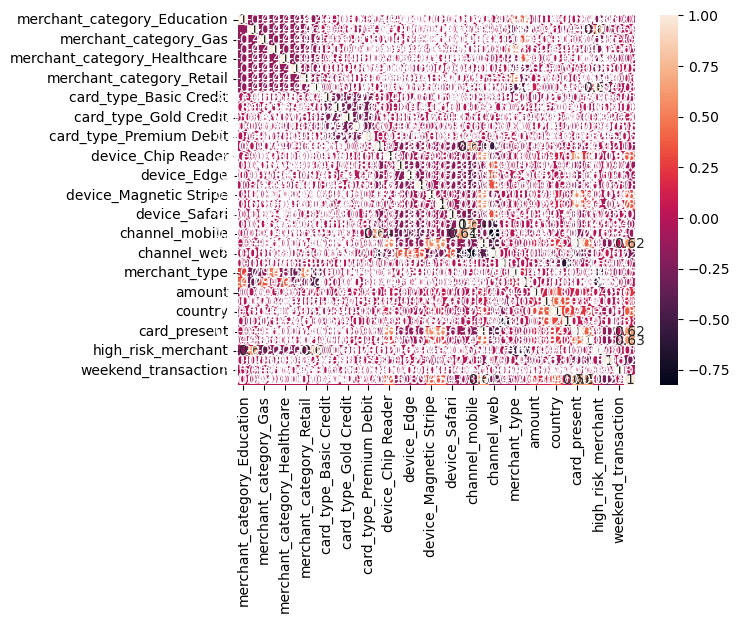

In [50]:
# cat plots of target with different columns
import seaborn as sns 

sns.heatmap(df_for_eda[['merchant_category_Education', 'merchant_category_Entertainment',
       'merchant_category_Gas', 'merchant_category_Grocery',
       'merchant_category_Healthcare', 'merchant_category_Restaurant',
       'merchant_category_Retail', 'merchant_category_Travel',
       'card_type_Basic Credit', 'card_type_Basic Debit',
       'card_type_Gold Credit', 'card_type_Platinum Credit',
       'card_type_Premium Debit', 'device_Android App', 'device_Chip Reader',
       'device_Chrome', 'device_Edge', 'device_Firefox',
       'device_Magnetic Stripe', 'device_NFC Payment', 'device_Safari',
       'device_iOS App', 'channel_mobile', 'channel_pos', 'channel_web',
       'city_size', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'card_present', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'target']].corr(),
            annot=True
           )
plt.show()

In [51]:
columns_group_1 = ['merchant_category_Education', 'merchant_category_Entertainment',
       'merchant_category_Gas', 'merchant_category_Grocery',
       'merchant_category_Healthcare', 'merchant_category_Restaurant',
       'merchant_category_Retail', 'merchant_category_Travel', 'target']

columns_group_2 = ['card_type_Basic Credit', 'card_type_Basic Debit',
       'card_type_Gold Credit', 'card_type_Platinum Credit',
       'card_type_Premium Debit', 'target']

columns_group_3 = [ 'device_Android App', 'device_Chip Reader',
       'device_Chrome', 'device_Edge', 'device_Firefox',
       'device_Magnetic Stripe', 'device_NFC Payment', 'device_Safari',
       'device_iOS App', 'target']

col_group_4 = ['channel_mobile', 'channel_pos', 'channel_web',
       'city_size', 'merchant_type', 'merchant', 'amount', 'currency',
       'target']

col_group_5 = ['country', 'city', 'card_present', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction', 'target']

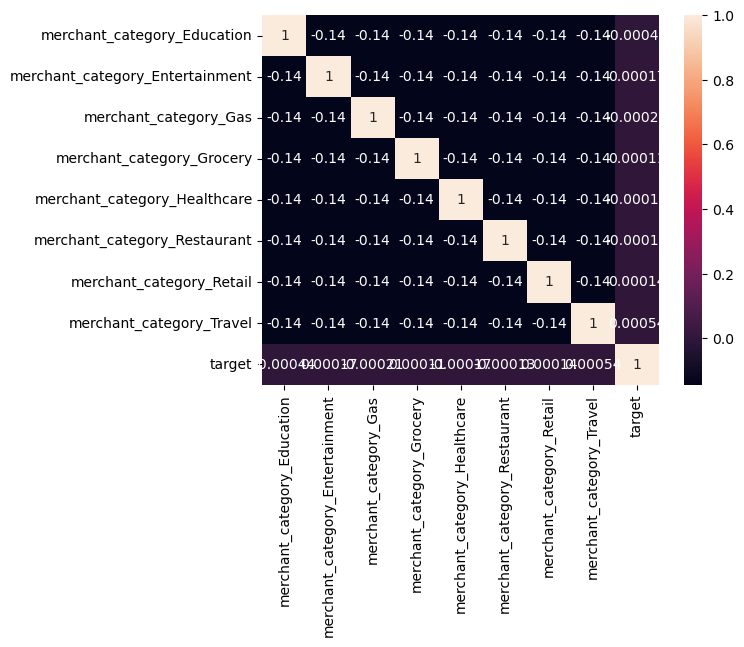

In [52]:
sns.heatmap(df_for_eda[columns_group_1].corr(), annot=True)
plt.show()

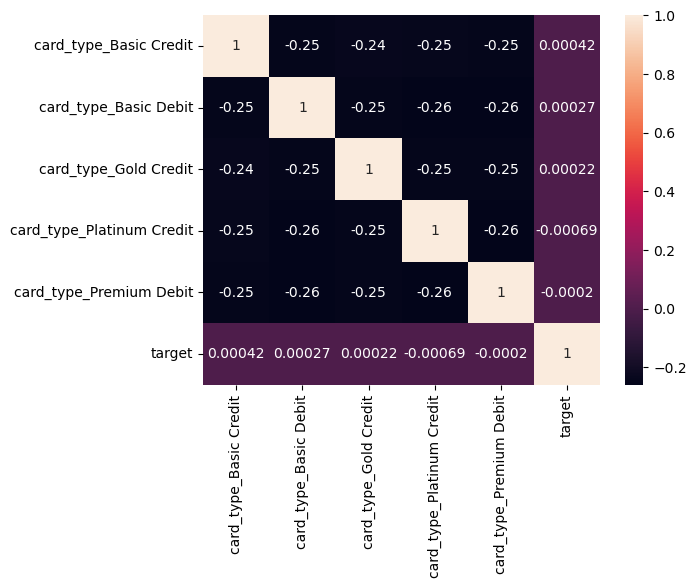

In [53]:
sns.heatmap(df_for_eda[columns_group_2].corr(), annot=True)
plt.show()

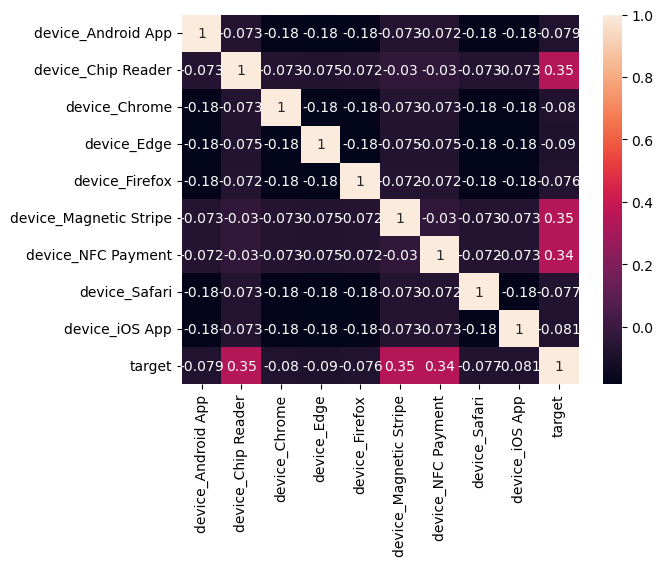

In [54]:
sns.heatmap(df_for_eda[columns_group_3].corr(), annot=True)
plt.show()

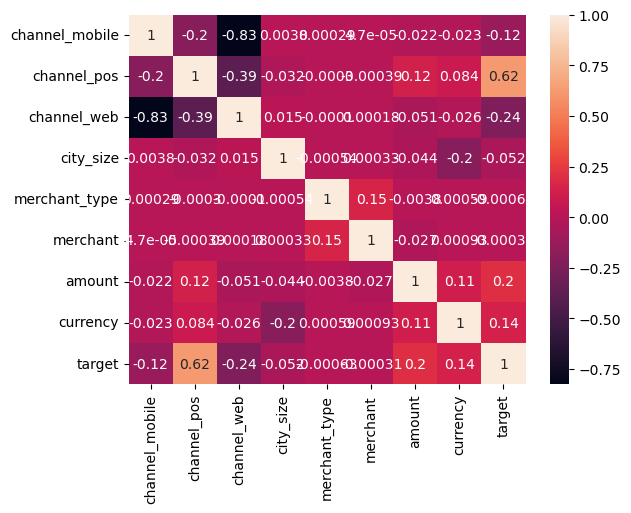

<Figure size 5000x5000 with 0 Axes>

In [55]:
sns.heatmap(df_for_eda[col_group_4].corr(), annot=True)
plt.figure(figsize=(50, 50))
plt.show()

***channel web and channel mobile have high negative correlation**

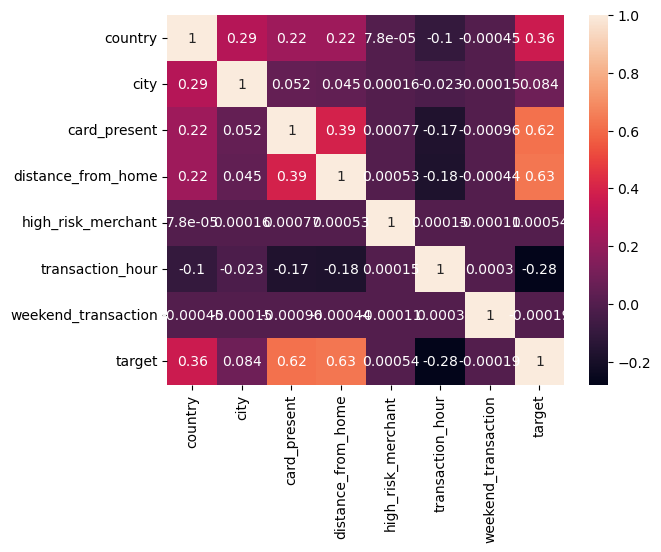

In [56]:
sns.heatmap(df_for_eda[col_group_5].corr(), annot=True)
plt.show()

**Checking with variance**
- Checking variations of data in features
if variation is zero (0) , means that column ( feature ) is not
having any correlation with dependent features. and we need to remove that column.


In [57]:
from sklearn.feature_selection import VarianceThreshold

In [58]:
df_for_eda.var()

merchant_category_Education        1.000000
merchant_category_Entertainment    1.000000
merchant_category_Gas              1.000000
merchant_category_Grocery          1.000000
merchant_category_Healthcare       1.000000
merchant_category_Restaurant       1.000000
merchant_category_Retail           1.000000
merchant_category_Travel           1.000000
card_type_Basic Credit             1.000000
card_type_Basic Debit              1.000000
card_type_Gold Credit              1.000000
card_type_Platinum Credit          1.000000
card_type_Premium Debit            1.000000
device_Android App                 1.000000
device_Chip Reader                 1.000000
device_Chrome                      1.000000
device_Edge                        1.000000
device_Firefox                     1.000000
device_Magnetic Stripe             1.000000
device_NFC Payment                 1.000000
device_Safari                      1.000000
device_iOS App                     1.000000
channel_mobile                  

The value 1 in the result of df.var() indicates that the variance for those particular features is 1, which means these features have some variation in their values across observations. This implies that the values of these features are not constant; they change across the dataset.

Here’s what it means in context:

Variance of 1: The feature has some variability, and its values differ across observations. The feature is contributing to the data, and it’s not constant, so it may provide useful information for the model.

Example: For features like merchant_category_Education, device_Android App, channel_mobile, etc., the variance being 1 means that these features take on different values across different rows in the dataset.

On the other hand, the feature target has a variance of 0.159721, which suggests that the values of the target variable are somewhat spread out, but not as much as those with a variance of 1. A lower variance indicates less variability, meaning the target values are more concentrated around a certain range (e.g., most values of target are either 0 or 1, but not with equal distribution).

In [59]:
df_for_eda.columns

Index(['merchant_category_Education', 'merchant_category_Entertainment',
       'merchant_category_Gas', 'merchant_category_Grocery',
       'merchant_category_Healthcare', 'merchant_category_Restaurant',
       'merchant_category_Retail', 'merchant_category_Travel',
       'card_type_Basic Credit', 'card_type_Basic Debit',
       'card_type_Gold Credit', 'card_type_Platinum Credit',
       'card_type_Premium Debit', 'device_Android App', 'device_Chip Reader',
       'device_Chrome', 'device_Edge', 'device_Firefox',
       'device_Magnetic Stripe', 'device_NFC Payment', 'device_Safari',
       'device_iOS App', 'channel_mobile', 'channel_pos', 'channel_web',
       'city_size', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'card_present', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'target'],
      dtype='object')

In [60]:
df_for_eda.head()

,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,card_type_Basic Credit,card_type_Basic Debit,...,amount,currency,country,city,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,target
0,-0.377255,2.645438,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,-0.482885,-0.51065,...,-0.183417,0.344873,1.016097,0.267312,-0.308215,-0.689410,1.731782,0.587390,1.697021,0
1,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,2.645361,-0.482885,-0.51065,...,0.346180,0.634276,1.410845,0.267312,-0.308215,1.450515,1.731782,0.740391,-0.589268,0
2,2.650726,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,-0.482885,-0.51065,...,-0.266830,1.782307,-0.795471,0.267312,-0.308215,-0.689410,-0.577440,1.046392,1.697021,0
3,2.650726,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,-0.482885,-0.51065,...,2.025886,0.634276,1.410845,0.267312,3.244484,1.450515,-0.577440,-1.248615,-0.589268,1
4,2.650726,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,2.070888,-0.51065,...,-0.267952,1.782307,-0.795471,0.267312,-0.308215,-0.689410,-0.577440,-0.789613,-0.589268,0


In [62]:
column_list = ['merchant_category_Education', 'merchant_category_Entertainment',
       'merchant_category_Gas', 'merchant_category_Grocery',
       'merchant_category_Healthcare', 'merchant_category_Restaurant',
       'merchant_category_Retail', 'merchant_category_Travel',
       'card_type_Basic Credit', 'card_type_Basic Debit',
       'card_type_Gold Credit', 'card_type_Platinum Credit',
       'card_type_Premium Debit', 'device_Android App', 'device_Chip Reader',
       'device_Chrome', 'device_Edge', 'device_Firefox',
       'device_Magnetic Stripe', 'device_NFC Payment', 'device_Safari',
       'device_iOS App', 'channel_mobile', 'channel_pos', 'channel_web',
       'city_size', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'card_present', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'target']

two_unique_values = []
more_unique_values = []
for i in column_list:
    value_count = df_for_eda[i].value_counts()
    unique = df_for_eda[i].unique()
    print(len(unique))
    if len(unique)<=2:
        two_unique_values.append(i)
    else:
        more_unique_values.append(i)
    print(f'For {i} \n value count: {value_count} \n and \nunique: {unique}\n\n')


print(two_unique_values)
print(more_unique_values)


2
For merchant_category_Education 
 value count: merchant_category_Education
-0.377255    3144656
 2.650726     447552
Name: count, dtype: int64 
 and 
unique: [-0.37725515  2.6507259 ]


2
For merchant_category_Entertainment 
 value count: merchant_category_Entertainment
-0.378009    3143089
 2.645438     449119
Name: count, dtype: int64 
 and 
unique: [ 2.64543823 -0.3780092 ]


2
For merchant_category_Gas 
 value count: merchant_category_Gas
-0.378078    3142946
 2.644957     449262
Name: count, dtype: int64 
 and 
unique: [-0.37807798  2.644957  ]


2
For merchant_category_Grocery 
 value count: merchant_category_Grocery
-0.377475    3144199
 2.649181     448009
Name: count, dtype: int64 
 and 
unique: [-0.37747514  2.64918107]


2
For merchant_category_Healthcare 
 value count: merchant_category_Healthcare
-0.378589    3141884
 2.641390     450324
Name: count, dtype: int64 
 and 
unique: [-0.37858855  2.64138998]


2
For merchant_category_Restaurant 
 value count: merchant_categor

**Note** 
 ---
 Most of the column above have only two values but different encoding is done (for space efficiency)
  
 Columns with only two distinct values
 1. merchant_category_education
 2.  ['merchant_category_Education', 'merchant_category_Entertainment', 'merchant_category_Gas', 'merchant_category_Grocery', 'merchant_category_Healthcare', 'merchant_category_Restaurant', 'merchant_category_Retail', 'merchant_category_Travel', 'card_type_Basic Credit', 'card_type_Basic Debit', 'card_type_Gold Credit', 'card_type_Platinum Credit', 'card_type_Premium Debit', 'device_Android App', 'device_Chip Reader', 'device_Chrome', 'device_Edge', 'device_Firefox', 'device_Magnetic Stripe', 'device_NFC Payment', 'device_Safari', 'device_iOS App', 'channel_mobile', 'channel_pos', 'channel_web', 'city_size', 'card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction', 'target']
 
Columns with different type of values 
1. ['merchant_type', 'merchant', 'amount', 'currency', 'country', 'city', 'transaction_hour']
---

If the feature is intended to indicate a binary outcome (weekend or not), it should be recoded to binary values, and it will likely be useful to keep. If the feature is incorrectly encoded or does not provide meaningful information, you may consider removing it.

If it’s meant to represent a binary feature (weekend or not): This feature might have been incorrectly encoded. You might want to convert it to a binary form (0 and 1) for clarity and better model performance. For instance, you could map the two unique values to 0 and 1 if they represent weekend and non-weekend transactions.

If it’s a numerical feature with meaningful continuous values: If weekend_transaction is supposed to represent some continuous measure related to weekend transactions, you can keep it as is. However, you should verify the meaning of those values.sa

**K ho yr encoding ta one hot suitable jasto dekhyo ta number bata kei error xa bhani hera ta**

### Creating Balanced data

In [64]:
df_for_eda.target.value_counts()

target
0    2875001
1     717207
Name: count, dtype: int64

In [65]:
normal_transaction = df_for_eda[df_for_eda['target']==0]
fraud_transaction = df_for_eda[df_for_eda['target']==1]

In [66]:
normal_transaction.head()
normal_transaction['target'].value_counts()

target
0    2875001
Name: count, dtype: int64

In [67]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(2875001, 38)
(717207, 38)


In [68]:
normal_transaction = normal_transaction.sample(n=716773)

In [69]:
normal_transaction.shape

(716773, 38)

In [70]:
balanced_df = pd.concat([normal_transaction,fraud_transaction], axis=0)

In [71]:
balanced_df['target'].value_counts()

target
1    717207
0    716773
Name: count, dtype: int64

In [72]:
balanced_df.head()

,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,card_type_Basic Credit,card_type_Basic Debit,...,amount,currency,country,city,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,target
363818,-0.377255,-0.378009,2.644957,-0.377475,-0.378589,-0.37809,-0.378199,-0.37802,-0.482885,1.958289,...,-0.269136,-1.220048,-1.118467,0.267312,-0.308215,-0.68941,-0.57744,-1.707616,1.697021,0
3587556,-0.377255,-0.378009,2.644957,-0.377475,-0.378589,-0.37809,-0.378199,-0.37802,-0.482885,-0.510650,...,-0.265603,-0.725113,-0.443373,0.267312,-0.308215,-0.68941,-0.57744,-0.942614,-0.589268,0
1879705,-0.377255,-0.378009,-0.378078,-0.377475,2.641390,-0.37809,-0.378199,-0.37802,-0.482885,-0.510650,...,-0.266104,-1.220048,-1.118467,0.267312,-0.308215,-0.68941,-0.57744,0.128389,-0.589268,0
2007860,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,2.644110,-0.37802,-0.482885,-0.510650,...,-0.263914,-0.725113,-0.443373,0.267312,-0.308215,-0.68941,-0.57744,-1.554616,-0.589268,0
652420,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,2.644110,-0.37802,-0.482885,1.958289,...,-0.266671,-1.220048,-1.118467,0.267312,-0.308215,-0.68941,-0.57744,0.893391,-0.589268,0


In [74]:
balanced_shuffled_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_shuffled_df.head()

,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,card_type_Basic Credit,card_type_Basic Debit,...,amount,currency,country,city,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,target
0,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,2.644110,-0.378020,-0.482885,1.958289,...,-0.201608,0.344873,1.016097,0.267312,-0.308215,-0.68941,-0.577440,0.893391,1.697021,0
1,-0.377255,2.645438,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,-0.482885,-0.510650,...,-0.085933,0.303398,0.959525,0.267312,-0.308215,-0.68941,1.731782,-1.095614,1.697021,0
2,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,2.645361,-0.482885,-0.510650,...,-0.266394,1.782307,-0.795471,0.267312,-0.308215,-0.68941,1.731782,-0.636613,-0.589268,0
3,-0.377255,-0.378009,-0.378078,-0.377475,2.641390,-0.37809,-0.378199,-0.378020,-0.482885,1.958289,...,-0.267460,1.782307,-0.912807,0.267312,-0.308215,-0.68941,-0.577440,0.128389,-0.589268,0
4,-0.377255,2.645438,-0.378078,-0.377475,-0.378589,-0.37809,-0.378199,-0.378020,-0.482885,-0.510650,...,-0.265068,-0.725113,-0.443373,0.267312,-0.308215,-0.68941,1.731782,-1.554616,-0.589268,0


# train test split

In [75]:
balanced_shuffled_df.shape

(1433980, 38)

In [80]:
train_test_df = balanced_shuffled_df.sample(frac=0.25, random_state=42) # memory not sufficient

In [81]:
train_test_df.shape

(358495, 38)

In [82]:
train_test_df.head()

,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,card_type_Basic Credit,card_type_Basic Debit,...,amount,currency,country,city,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,target
190522,-0.377255,2.645438,-0.378078,-0.377475,-0.378589,-0.378090,-0.378199,-0.37802,-0.482885,1.958289,...,-0.269431,-1.026523,-0.854499,0.267312,-0.308215,-0.689410,1.731782,0.893391,1.697021,0
62683,-0.377255,-0.378009,-0.378078,-0.377475,2.641390,-0.378090,-0.378199,-0.37802,-0.482885,-0.510650,...,-0.264005,-1.026523,-0.854499,0.267312,-0.308215,-0.689410,-0.577440,-1.248615,-0.589268,0
261624,-0.377255,2.645438,-0.378078,-0.377475,-0.378589,-0.378090,-0.378199,-0.37802,-0.482885,1.958289,...,-0.191745,-1.048331,-0.884244,0.267312,-0.308215,-0.689410,1.731782,0.281389,-0.589268,0
125271,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,-0.378090,2.644110,-0.37802,-0.482885,-0.510650,...,-0.024320,0.303398,0.959525,0.267312,-0.308215,1.450515,-0.577440,-1.248615,-0.589268,1
537060,-0.377255,-0.378009,-0.378078,-0.377475,-0.378589,2.644876,-0.378199,-0.37802,-0.482885,-0.510650,...,-0.267952,1.782307,-0.795471,0.267312,-0.308215,-0.689410,-0.577440,0.128389,-0.589268,0


In [83]:
train_test_df['target'].value_counts()

target
1    179297
0    179198
Name: count, dtype: int64

In [87]:
from sklearn.ensemble import RandomForestClassifier

bal_clf = RandomForestClassifier()
X = train_test_df.drop('target', axis=1)
y = train_test_df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

bal_clf.fit(x_train, y_train)
bal_clf.score(x_test, y_test)

# memory 

0.9561500160392753

In [89]:
from sklearn.metrics import classification_report
y_preds = bal_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     36011
           1       0.96      0.95      0.96     35688

    accuracy                           0.96     71699
   macro avg       0.96      0.96      0.96     71699
weighted avg       0.96      0.96      0.96     71699



*Score* so good no need to tune hyperparameters

**SAving model**

In [92]:
from joblib import dump
dump(bal_clf, filename='./models/balanced_dataset_trained.joblib')

['./models/balanced_dataset_trained.joblib']

In [94]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

def evaluate_model(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'precision': round(precision, 2),
        'f1': round(f1, 2)
    }
    print(f'Acc: {accuracy*100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')

    return metric_dict

Acc: 86.44%
Precision: 0.96
Recall: 0.76
F1 score: 0.85
Acc: 95.62%
Precision: 0.96
Recall: 0.95
F1 score: 0.96


<Axes: >

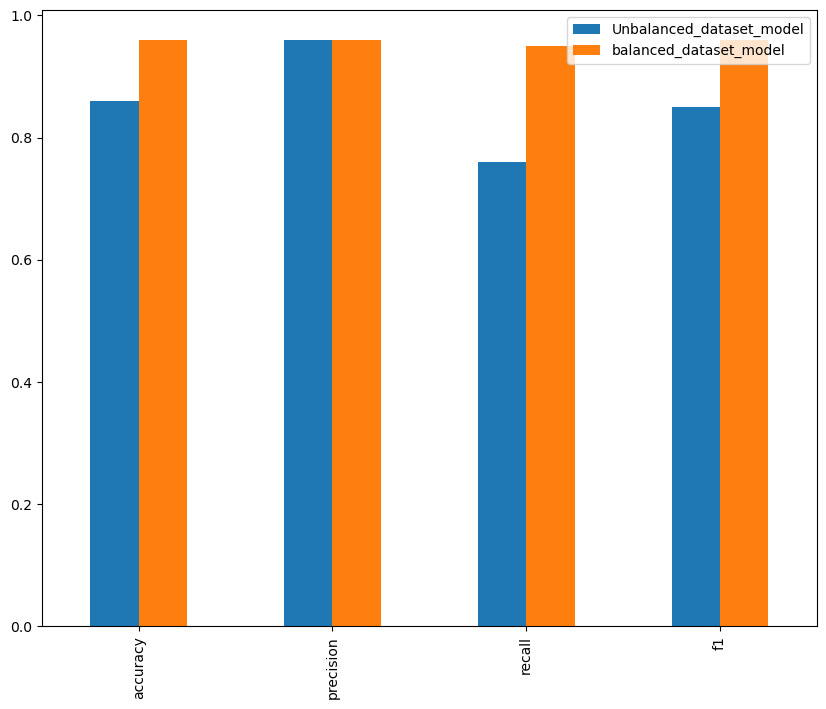

In [95]:
model_preds = model.predict(x_test)
bal_model_preds = bal_clf.predict(x_test)
model_metric = evaluate_model(y_test, model_preds)
bal_model_metric = evaluate_model(y_test, bal_model_preds)

compare_metric = pd.DataFrame({'Unbalanced_dataset_model': model_metric,
                              'balanced_dataset_model':bal_model_metric})

compare_metric.plot.bar(figsize=(10, 8))


# END

#### The END

In [ ]:
def make_prediction(pred_set_x):
    pred_set_x= ct.transform(pred_set_x)
    pred_set_x= sc.transform(pred_set_x)
    result= model.predict(pd.DataFrame(pred_set_x, columns=X_train_enc.columns))
    return le.inverse_transform(result)
    # for pred in result:    
    #     if pred:
    #         print("Danger")
    #     else:
    #         print('ok ')

make_prediction(X_test[10:12])

In [ ]:
X_test.head(2)

In [ ]:
model.predict(sc.transform(ct.transform(X_test[10:13])))

In [ ]:
# frequency encoding
for col in freq_enc:
    freq= all_df[col][:1000].value_counts().to_dict()    
    print(col, " -> ", min(freq.values()))

In [ ]:
del_df= all_df[10000:20000].copy()

In [ ]:
X_del = del_df.drop('is_fraud', axis=1)
X_del.drop(col_to_drop, axis=1, inplace=True)
X_del.head()

In [ ]:
num_cols

In [ ]:
X_del.head(2)

In [ ]:
X_del.drop(ord_enc + num_cols, inplace=True, axis=1)

In [ ]:
del_X_train, del_X_test= train_test_split(X_del, test_size=0.4)

In [ ]:
# frequency encoding
all_freq_map= {}
for col in freq_enc:
    freq_map= del_X_train[col][:1000].value_counts().to_dict()
    all_freq_map[col]= freq_map
    # min_freq= min(freq.values())
    # print(min_freq)
    # del_X_train['new'+ col]= del_X_train[col].map(freq)
    # del_X_test['new'+ col]= del_X_test[col].map(freq)
    # print(col, " -> ", min(freq.values()))

In [ ]:
for col, freq in all_freq_map.items():
    del_X_train['new'+ col]= del_X_train[col].map(freq)
    del_X_test['new'+ col]= del_X_test[col].map(freq).fillna(min(freq.values()))

In [ ]:
pred_df= pd.DataFrame([['Healthcare',	3124,	812,	724949.27,	7143,	7143,	47401,	'medium',	'Basic Debit',	False,	'Chrome',	'web',	1,	1,	False,	0,	False]],
                       columns=X_train.columns)
pred_df

make_prediction(pred_df)

In [ ]:
X_train_enc

#### rough

In [ ]:
ct= ColumnTransformer(transformers=[
    ('one-hot', OneHotEncoder(), one_enc),
    ('ordinal', OrdinalEncoder(categories= [['medium', 'large']]), ord_enc),
    # ('bin-value', LabelEncoder(), label_enc)
    
], remainder='passthrough')

le= LabelEncoder()
sc= StandardScaler()

# encode features
X_train_enc= ct.fit_transform(X_train)
X_test_enc= ct.transform(X_test)

# encode label 
y_train_enc= le.fit_transform(y_train)
y_test_enc= le.transform(y_test)

# standardarize 
X_train_enc= sc.fit_transform(X_train_enc)  # only numeric and frequency encoded columns only 
X_test_enc= sc.transform(X_test_enc)

In [ ]:
X_train.columns

In [ ]:
len(['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False])

In [ ]:
len(X_train.columns)

In [ ]:
model.predict(sc.transform(ct.transform(pd.DataFrame([['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False]], columns=list(X_train.columns)))))

In [ ]:
model.predict(pd.DataFrame(sc.transform(ct.transform(pd.DataFrame([['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False]], columns=list(X_train.columns)))), columns=feature_names))

In [ ]:
make_prediction(pd.DataFrame([['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False]], columns=X_train.columns))

In [ ]:
pred = model.predict(sc.transform(ct.transform(
            [['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False]])))

print(pred)

other models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2= RandomForestClassifier()

In [ ]:
model_2.fit(X_train_enc, y_train_enc)

In [ ]:
model_2.score(X_test_enc, y_test_enc)